Experiment 7

Princial Component Analysis

Aim : Write a program to implement the feature reduction using PCA. Calculate the covariance between features to find the optimal number of components


In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

cov_matrix = np.cov(scaled_data.T)

pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_data)

print("\nExplained Variance Ratio (for 3 components):", pca.explained_variance_ratio_)
print("Total Variance Explained:", sum(pca.explained_variance_ratio_))

orig_var = np.var(scaled_data, axis=0)[:3]
pca_var = np.var(pca_data, axis=0)

comparison_df = pd.DataFrame({
    "Original (Scaled)": orig_var,
    "PCA Transformed": pca_var
}, index=[f"Feature{i+1} vs PC{i+1}" for i in range(1, 4)])



Explained Variance Ratio (for 3 components): [0.72962445 0.22850762 0.03668922]
Total Variance Explained: 0.9948212908928451


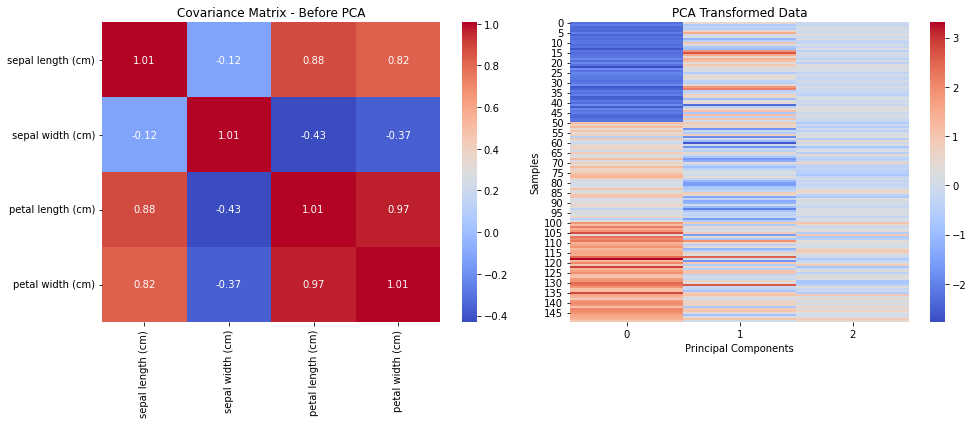

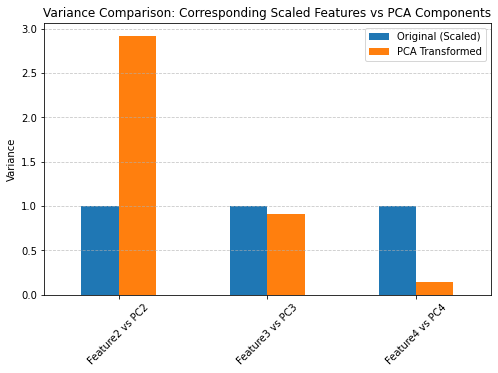

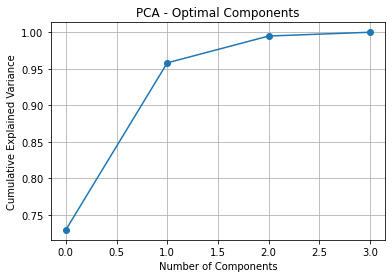

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(cov_matrix, annot=True, fmt=".2f",
            xticklabels=df.columns, yticklabels=df.columns,
            cmap="coolwarm", ax=axes[0])
axes[0].set_title("Covariance Matrix - Before PCA")

sns.heatmap(pca_data, cmap="coolwarm", ax=axes[1], cbar=True)
axes[1].set_title("PCA Transformed Data")
axes[1].set_xlabel("Principal Components")
axes[1].set_ylabel("Samples")
plt.tight_layout()
plt.show()

comparison_df.plot(kind="bar", figsize=(8,5))
plt.ylabel("Variance")
plt.title("Variance Comparison: Corresponding Scaled Features vs PCA Components")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

pca_full = PCA()
pca_full.fit(scaled_data)
plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Optimal Components")
plt.grid(True)
plt.show()